In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error
import warnings
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from itertools import combinations
from sklearn.base import clone
warnings.filterwarnings("ignore")

In [7]:
df = pd.read_csv('mdlon.csv')
df

,at1,at2,at3,at4,at5,at6,at7,at8,at9,at10,...,at492,at493,at494,at495,at496,at497,at498,at499,at500,T
0,485,477,537,479,452,471,491,476,475,473,...,481,477,485,511,485,481,479,475,496,-1
1,483,458,460,487,587,475,526,479,485,469,...,478,487,338,513,486,483,492,510,517,-1
2,487,542,499,468,448,471,442,478,480,477,...,481,492,650,506,501,480,489,499,498,-1
3,480,491,510,485,495,472,417,474,502,476,...,480,474,572,454,469,475,482,494,461,1
4,484,502,528,489,466,481,402,478,487,468,...,479,452,435,486,508,481,504,495,511,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,490,505,503,474,463,461,519,476,518,467,...,479,449,588,499,506,475,463,507,501,1
1996,480,475,476,480,495,482,515,479,480,484,...,474,473,424,454,570,476,493,465,485,-1
1997,480,517,631,470,485,474,535,476,493,466,...,483,479,687,488,488,483,500,523,481,-1
1998,484,481,505,478,542,477,518,477,510,472,...,483,526,750,486,529,484,473,527,485,1


In [8]:
x = df
x = x.drop(['T'],axis=1)
y = df[['T']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=8)
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [9]:
clf = GaussianNB()
columns = x.columns
num_of_features = columns.shape
selected = []
error = []
for f in range(num_of_features[0]):
    min_error = float('inf')
    min_index = 1
    for n in range(num_of_features[0]):
        if (n not in selected):
            selected.append(n);
            clf.fit(x_train[:,selected],y_train)
            preds = clf.predict(x_test[:,selected])
            mse = mean_squared_error(preds , y_test)
            if mse < min_error:
                min_error = mse
                min_index = n
            selected.pop()
    selected.append(min_index)
    error.append(min_error)

Text(0.5, 1.0, 'Sequential Forward Selection')

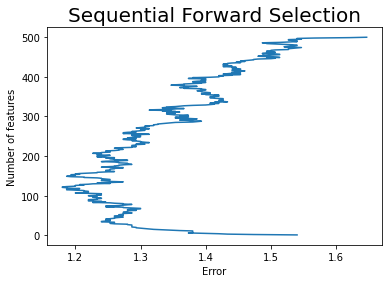

In [10]:
plt.plot(error,np.linspace(1,500,500))
plt.xlabel('Error')
plt.ylabel('Number of features')
plt.title("Sequential Forward Selection",fontsize=20)

In [66]:
error_min = min(error)
min_index = error.index(error_min)
print('selected features are = ',min_index)
print(selected[:min_index])

selected features are =  120
[475, 493, 139, 118, 268, 287, 41, 21, 181, 25, 179, 161, 277, 27, 393, 291, 208, 62, 183, 468, 392, 112, 58, 203, 20, 125, 376, 90, 228, 86, 99, 240, 138, 108, 396, 364, 341, 487, 274, 385, 316, 355, 325, 269, 314, 486, 354, 133, 339, 178, 185, 484, 96, 222, 273, 191, 439, 440, 330, 144, 459, 390, 417, 437, 212, 315, 170, 146, 478, 148, 154, 224, 219, 426, 124, 345, 8, 258, 22, 187, 57, 276, 143, 358, 166, 200, 389, 66, 173, 24, 160, 452, 67, 123, 428, 210, 91, 250, 7, 169, 374, 137, 29, 35, 113, 460, 419, 451, 1, 302, 400, 127, 249, 359, 427, 448, 327, 15, 337, 197]


In [62]:
class Backward():
    def __init__(self, estimator, count):
        self.estimator = clone(estimator)
        self.count = count

    def transform(self, X):
        return X[:, self.indices_]
     
    def _calc_score(self, X_train, X_test, y_train, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train.ravel())
        y_pred = self.estimator.predict(X_test[:, indices])
        score = accuracy_score(y_test, y_pred)
        return score    

    def fit(self, X_train, X_test, y_train, y_test):
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, X_test,y_train, y_test, self.indices_)
        self.scores_ = [score]
        while dim > self.count:
            scores = []
            subsets = []
            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, X_test, y_train, y_test, p)
                scores.append(score)
                subsets.append(p)
            best_score_index = np.argmax(scores)
            self.scores_.append(scores[best_score_index])
            self.indices_ = subsets[best_score_index]
            self.subsets_.append(self.indices_)
            dim -= 1

In [47]:
clf =  GaussianNB()
back = Backward(clf, 1)
back.fit(x_train, x_test, y_train, y_test)

In [48]:
x_train_kfeatures = back.transform(x_train)
X_test_kfeatures = back.transform(x_test)

Text(0, 0.5, 'Number of features')

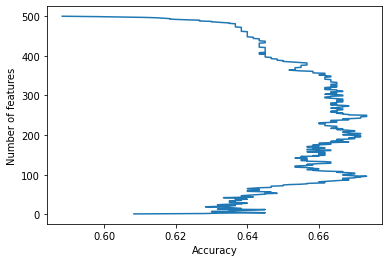

In [78]:
plt.plot( back.scores_,np.linspace(500,1,500))
plt.xlabel('Accuracy')
plt.ylabel('Number of features')

In [75]:
error_min = max(back.scores_)
min_index = back.scores_.index(error_min)
print('selected features are = ',min_index)

selected features are =  250
